#Quienes somos:

*   Juan David Buendía Loyo
*   Juan Camilo Arguelles
*   Juan Camilo Mancipe
*   Brayan Steven Tarache
*   Jeffernson Alvarez  

#Tematica: Violencia de género e intrafamiliar
---
Origen de la data:
https://www.datos.gov.co/Salud-y-Protecci-n-Social/04-Violencia-de-G-nero-e-intrafamiliar-de-enero-20/sq8q-pnf5/data




#P0. importar librerias (5%)

##P0.1 librerias genericas

In [3]:
#Librerias generales para administración de la data
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##P0.2 librerias para Machine learning

In [4]:
#Librerias especializadas para hacer machine learning (k-means y/o otros)
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics 
# Regresion logística 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Módulo necesario para trabajar Árboles
from sklearn.tree import DecisionTreeClassifier

#P1. importando dataset (5%)

In [5]:
df_parcial = pd.read_csv("https://raw.githubusercontent.com/jcamilo260/Machine-Learning/master/DataSetViolencia.csv")
df_parcial.head(10)  

,Orden,Departamento,Municipio,semana,año,Grupo edad,Ciclo de vida,sexo_,area_,Barrio,...,sust_vict,fec_hecho,hora_hecho,escenario,zona_conf,nom_eve,nom_upgd,ndep_resi,nmun_resi,MES
0,1,SANTANDER,BUCARAMANGA,23,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Transición,...,2,2015-06-12T00:00:00.000,06:30:00 a. m.,1.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,SERVICLINICOS DROMEDICA SA,SANTANDER,BUCARAMANGA,06. Junio
1,2,SANTANDER,BUCARAMANGA,5,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Betania,...,2,2015-02-04T00:00:00.000,10:00:00 a. m.,1.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,02. Febrero
2,3,SANTANDER,BUCARAMANGA,29,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,EL MIRADOR,...,2,2015-07-21T00:00:00.000,08:00:00 a. m.,2.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,BUCARAMANGA,07. Julio
3,4,SANTANDER,BUCARAMANGA,16,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,María Paz,...,2,2015-04-22T00:00:00.000,01:30:00 p. m.,1.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,04. Abril
4,5,SANTANDER,BUCARAMANGA,44,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Colorados,...,2,2015-11-01T00:00:00.000,08:00:00 p. m.,7.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,11. Noviembre
5,6,SANTANDER,BUCARAMANGA,45,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Café Madrid,...,2,2015-11-10T00:00:00.000,12:00:00 a. m.,7.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,CENTRO DE SALUD CAFE MADRID,SANTANDER,BUCARAMANGA,11. Noviembre
6,7,SANTANDER,BUCARAMANGA,47,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,UNIVERSIDAD,...,2,2015-11-25T00:00:00.000,09:15:00 a. m.,3.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,11. Noviembre
7,8,SANTANDER,BUCARAMANGA,45,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Colseguros Norte,...,2,2015-11-14T00:00:00.000,08:00:00 p. m.,1.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,SERVICLINICOS DROMEDICA SA,SANTANDER,BUCARAMANGA,11. Noviembre
8,9,SANTANDER,BUCARAMANGA,26,2015,7 a 11,Infancia,Femenino,CABECERA MUNICIPAL,María Paz,...,2,2015-07-01T00:00:00.000,04:00:00 p. m.,2.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,07. Julio
9,10,SANTANDER,BUCARAMANGA,17,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,Villa Rosa,...,2,2015-04-28T00:00:00.000,01:00:00 a. m.,2.0,2.0,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,04. Abril


#P2.Conociendo y normalizando los datos (30%)


###P2.0 generales (10%)

---
*   dimensiones del dataframe
*   existen columnas con nulos?
*   todos las columnas son númericos?
*   existen valores negativos?...si existen que hacemos con ellos?


In [6]:
# Dimensiones del Data Frame
print(f"Filas {df_parcial.shape[0]}, columnas {df_parcial.shape[1]}")
df_parcial.shape

Filas 20080, columnas 32


(20080, 32)

In [7]:
# Conociendo los datos
df_parcial.describe()

,Orden,semana,año,pac_hos_,con_fin_,naturaleza,actividad,edad_agre,sust_vict,escenario,zona_conf
count,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,19989.000000,20080.000000,14911.000000,20080.000000,19364.000000,17784.000000
mean,5021.328735,25.253237,2017.606175,1.713795,1.001693,8.725499,27.003835,20.534505,1.987002,2.507488,2.000169
std,2899.805482,14.979354,2.061624,0.451998,0.049873,23.501524,3.294505,17.036742,0.113268,1.997260,1.264204
min,1.000000,1.000000,2015.000000,1.000000,0.000000,1.000000,8.000000,0.000000,1.000000,1.000000,0.000000
25%,2510.750000,12.000000,2016.000000,1.000000,1.000000,1.000000,24.000000,0.000000,2.000000,2.000000,2.000000
50%,5020.500000,24.500000,2017.000000,2.000000,1.000000,3.000000,26.000000,22.000000,2.000000,2.000000,2.000000
75%,7530.250000,38.000000,2019.000000,2.000000,1.000000,3.000000,28.000000,32.000000,2.000000,2.000000,2.000000
max,10169.000000,53.000000,2022.000000,2.000000,2.000000,99.000000,33.000000,99.000000,2.000000,12.000000,7.000000


In [8]:
# Existen columnas con null?
df_parcial.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                    91
def_naturaleza                91
actividad                      0
nom_actividad                  0
edad_agre                   5169
sexo_agre                      2
parentezco_vict                0
sust_vict                      0
fec_hecho                     10
hora_hecho                  8741
escenario                    716
zona_conf                   2296
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

In [9]:
# Verificar tipos de datos
df_parcial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20080 entries, 0 to 20079
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Orden                     20080 non-null  int64  
 1   Departamento              20080 non-null  object 
 2   Municipio                 20080 non-null  object 
 3   semana                    20080 non-null  int64  
 4   año                       20080 non-null  int64  
 5   Grupo edad                20080 non-null  object 
 6   Ciclo de vida             20080 non-null  object 
 7   sexo_                     20080 non-null  object 
 8   area_                     20080 non-null  object 
 9   Barrio                    20080 non-null  object 
 10  Comuna                    20080 non-null  object 
 11  Tipo de Seguridad Social  20080 non-null  object 
 12  pac_hos_                  20080 non-null  int64  
 13  con_fin_                  20080 non-null  int64  
 14  versio

In [10]:
# Valores NaN
df_parcial.isna().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                    91
def_naturaleza                91
actividad                      0
nom_actividad                  0
edad_agre                   5169
sexo_agre                      2
parentezco_vict                0
sust_vict                      0
fec_hecho                     10
hora_hecho                  8741
escenario                    716
zona_conf                   2296
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

In [11]:
df_parcial = df_parcial.dropna() # Eliminar los valores NaN
df_parcial = df_parcial.reset_index(drop=True) # Se hace un reset 
df_parcial.isnull().sum() # Verificamos de nuevo

Orden                       0
Departamento                0
Municipio                   0
semana                      0
año                         0
Grupo edad                  0
Ciclo de vida               0
sexo_                       0
area_                       0
Barrio                      0
Comuna                      0
Tipo de Seguridad Social    0
pac_hos_                    0
con_fin_                    0
version                     0
naturaleza                  0
def_naturaleza              0
actividad                   0
nom_actividad               0
edad_agre                   0
sexo_agre                   0
parentezco_vict             0
sust_vict                   0
fec_hecho                   0
hora_hecho                  0
escenario                   0
zona_conf                   0
nom_eve                     0
nom_upgd                    0
ndep_resi                   0
nmun_resi                   0
MES                         0
dtype: int64

##P2.1 Normalizando los datos (50%)

###P2.1.1 Convertir datos object (Categoricos o Text) en Data Numerica/DateTime

In [12]:
df_parcial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Orden                     11339 non-null  int64  
 1   Departamento              11339 non-null  object 
 2   Municipio                 11339 non-null  object 
 3   semana                    11339 non-null  int64  
 4   año                       11339 non-null  int64  
 5   Grupo edad                11339 non-null  object 
 6   Ciclo de vida             11339 non-null  object 
 7   sexo_                     11339 non-null  object 
 8   area_                     11339 non-null  object 
 9   Barrio                    11339 non-null  object 
 10  Comuna                    11339 non-null  object 
 11  Tipo de Seguridad Social  11339 non-null  object 
 12  pac_hos_                  11339 non-null  int64  
 13  con_fin_                  11339 non-null  int64  
 14  versio

In [13]:
# Conversion de Datos 
# Departamento , Municipio, Grupo edad , Ciclo de vida  , sexo_, Barrio,
# Comuna, Tipo de Seguridad Social, version, def_naturaleza, nom_actividad,
# sexo_agre, parentezco_vict, fec_hecho, hora_hecho, nom_eve, nom_upgd, ndep_resi,
# nmun_resi, MES
print(f" Valores de Departamento a reemplazar : {df_parcial['Departamento'].unique()} \n")
print(f" Valores de Municipio a reemplazar : {df_parcial['Municipio'].unique()} \n")
print(f" Valores de Grupo edad a reemplazar : {df_parcial['Grupo edad'].unique()} \n")
print(f" Valores de Ciclo de vida  a reemplazar : {df_parcial['Ciclo de vida'].unique()} \n")
print(f" Valores de sexo_ a reemplazar : {df_parcial['sexo_'].unique()} \n")
print(f" Valores de Barrio a reemplazar : {df_parcial['Barrio'].unique()} \n")
print(f" Valores de Comuna a reemplazar : {df_parcial['Comuna'].unique()} \n")
print(f" Valores de Tipo de Seguridad Social a reemplazar : {df_parcial['Tipo de Seguridad Social'].unique()} \n")
print(f" Valores de version a reemplazar : {df_parcial['version'].unique()} \n")
print(f" Valores de def_naturaleza a reemplazar : {df_parcial['def_naturaleza'].unique()} \n")
print(f" Valores de nom_actividad a reemplazar : {df_parcial['nom_actividad'].unique()} \n")
print(f" Valores de sexo_agre a reemplazar : {df_parcial['sexo_agre'].unique()} \n")
print(f" Valores de parentezco_vict  a reemplazar : {df_parcial['parentezco_vict'].unique()} \n")
print(f" Valores de fec_hecho a reemplazar : {df_parcial['fec_hecho'].unique()} \n")
print(f" Valores de hora_hecho a reemplazar : {df_parcial['hora_hecho'].unique()} \n")
print(f" Valores de nom_eve a reemplazar : {df_parcial['nom_eve'].unique()} \n")
print(f" Valores de nom_upgd a reemplazar : {df_parcial['nom_upgd'].unique()} \n")
print(f" Valores de ndep_resi a reemplazar : {df_parcial['ndep_resi'].unique()} \n")
print(f" Valores de nmun_resi a reemplazar : {df_parcial['nmun_resi'].unique()} \n")
print(f" Valores de MES a reemplazar : {df_parcial['MES'].unique()} \n")


 Valores de Departamento a reemplazar : ['SANTANDER' 'NORTE SANTANDER' 'BOLIVAR' 'CAQUETA' 'ARAUCA'] 

 Valores de Municipio a reemplazar : ['BUCARAMANGA' 'CUCUTA' 'ARENAL' '* CAQUETA. MUNICIPIO DESCONOCIDO'
 'FLORIDABLANCA' 'RIONEGRO' 'BARRANCABERMEJA' 'TAME'] 

 Valores de Grupo edad a reemplazar : ['12 a 17' '7  a 11' '18 a 28' '0 a 6' '29 a 59' '60 y mas'] 

 Valores de Ciclo de vida  a reemplazar : ['Adolescencia' 'Infancia' 'Jovenes' 'Primera infancia' 'Adultez'
 'Persona Mayor'] 

 Valores de sexo_ a reemplazar : ['Masculino' 'Femenino'] 

 Valores de Barrio a reemplazar : ['Transición' 'Betania' 'EL MIRADOR' 'María Paz' 'Colorados' 'Café Madrid'
 'UNIVERSIDAD' 'Colseguros Norte' 'Villa Rosa' 'Claveriano' 'GIRARDOT'
 'Puente Nariño' 'Campestre Norte (Getsemaní, los cerros, la Fortuna)'
 'CABECERA DEL LLANO'
 'Villas de San Ignacio (Sectores Bavaria I, II, Betania I, II, Ingeser)'
 'COMUNEROS' 'Altos del Progreso' 'MIRAMAR' 'SIN INFORMACION'
 'Villa Mercedes' 'KENNEDY' 'Cervunion

In [14]:
# Eliminar columnas que no queremos para analizar
df_parcial_v2 = df_parcial.drop(columns=['version', 'Tipo de Seguridad Social',
'Barrio','Comuna', 'nom_upgd', 'nmun_resi', 'Ciclo de vida','area_', 'semana', 'pac_hos_',
'naturaleza', 'actividad','escenario','fec_hecho','zona_conf','con_fin_', 'nom_eve','hora_hecho'])

In [15]:
df_parcial_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Orden            11339 non-null  int64  
 1   Departamento     11339 non-null  object 
 2   Municipio        11339 non-null  object 
 3   año              11339 non-null  int64  
 4   Grupo edad       11339 non-null  object 
 5   sexo_            11339 non-null  object 
 6   def_naturaleza   11339 non-null  object 
 7   nom_actividad    11339 non-null  object 
 8   edad_agre        11339 non-null  float64
 9   sexo_agre        11339 non-null  object 
 10  parentezco_vict  11339 non-null  object 
 11  sust_vict        11339 non-null  int64  
 12  ndep_resi        11339 non-null  object 
 13  MES              11339 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.2+ MB


In [16]:
#df_parcial_v2['Departamento'].unique()
#df_parcial_v2['Municipio'].unique()
#df_parcial_v2['Grupo edad'].unique()
#df_parcial_v2['sexo_'].unique()
#df_parcial_v2['def_naturaleza'].unique()
#df_parcial_v2['nom_actividad'].unique()
#df_parcial_v2['sexo_agre'].unique()
#df_parcial_v2['parentezco_vict'].unique()
#df_parcial_v2['ndep_resi'].unique()
#df_parcial_v2['MES'].unique()


In [17]:
#df_parcial['departamento']= df_parcial['departamento'].str.replace(' SANTANDER ','1')
values_departamento = {'Departamento':{'SANTANDER':1, 'NORTE SANTANDER':2, 'BOLIVAR':3,
'CAQUETA':4, 'ARAUCA':5}}
df_parcial_v2.replace(values_departamento, inplace=True)

values_municipio  = {'Municipio':{'BUCARAMANGA':1, 'CUCUTA':2, 'ARENAL':3,
'* CAQUETA. MUNICIPIO DESCONOCIDO':4, 'FLORIDABLANCA':5, 'RIONEGRO':6, 'BARRANCABERMEJA':7, 'TAME':8}}
df_parcial_v2.replace(values_municipio, inplace=True)

values_grupo_edad = {'Grupo edad':{'12 a 17':1,'7  a 11':2,'18 a 28':3,'0 a 6':4, '29 a 59':5, '60 y mas':6}}
df_parcial_v2.replace(values_grupo_edad, inplace=True)

values_sexo = {'sexo_':{'Masculino':1, 'Femenino':2}}
df_parcial_v2.replace(values_sexo, inplace=True)

values_def_naturaleza= {'def_naturaleza':{'Negligencia y abandono':1, 'Violencia fisica':2, 'Abuso sexual':3,
       'Violencia psicologica':4, 'Acoso sexual':5, 'Violacion':6,
       'Actos sexuales violencia':7, 'Sin información':8,
       'Otros actos sexuales':9}}
df_parcial_v2.replace(values_def_naturaleza, inplace=True)


values_nom_actividad= {'nom_actividad':{'Otro':1, 'Estudiante':2, 'Reciclador':3, 'Trabajadora domestica':4,
       'Servidor publico':5, 'Maestro':6, 'Fuerza publica':7, 'Ninguna':8,
       'Persona dedicada al cuidado del hogar':9, 'Líder cívico':10,
       'Sin información':11, 'Persona en situación de prostitución':12,
       'ERROR: #N/A':13, 'Persona que cuida a otros':14}}
df_parcial_v2.replace(values_nom_actividad, inplace=True)

values_sexo_agre = {'sexo_agre':{'M':1, 'F':2, 'SD':3}}
df_parcial_v2.replace(values_sexo_agre, inplace=True)

values_parentezco_vict = {'parentezco_vict':{'Padre':1, 'Otros':2, 'Madre':3, 'Esposo':4, 'Excompañero permanente':5,
       'Hermano (a)':6, 'Novio(a)':7, 'Primo (a)':8, 'Compañero permanente':9,
       'Tío (a)':10, 'Cuñado (a)':11, 'Padrasto':12, 'Hijo':13, 'Abuelo (a)':14,
       'Ex - novio':15, 'Ex esposo(a)':16, 'Suegro (a)':17, 'Madrasta':18,
       'Encargado (a) del NNA/Adulto mayor':19, 'Ex - amante':20, 'Pareja':21,
       'Ex pareja':22, 'Amante':23, 'Familiar':24, 'Ninguno':0}}
df_parcial_v2.replace(values_parentezco_vict, inplace=True)

#values_hora_hecho = {'hora_hecho':{'06:30:00 a.\xa0m.':1, '10:00:00 a.\xa0m.':2, '08:00:00 a.\xa0m.':3, ...:4,
#       '21:55':5, '18:06':6, '16:20':7}}
#df_parcial_v2.replace(values_hora_hecho, inplace=True)

values_ndep_resi = {'ndep_resi':{'SANTANDER':1, 'CASANARE':2, 'EXTERIOR':3, 'HUILA':4, 'AMAZONAS':5, 'CESAR':6,
       'NORTE SANTANDER':7, 'TOLIMA':8, 'ANTIOQUIA':9, 'BOLIVAR':10, 'BOYACA':11,
       'CUNDINAMARCA':12}}
df_parcial_v2.replace(values_ndep_resi, inplace=True)

values_MES = {'MES':{'06. Junio':6, '02. Febrero':2, '07. Julio':7, '04. Abril':4,
       '11. Noviembre':11, '08. Agosto':8, '09. Septiembre':9, '01. Enero':1,
       '03. Marzo':3, '10. Octubre':10, '12. Diciembre':12, '05. Mayo':5}}
df_parcial_v2.replace(values_MES, inplace=True) 

# Lo que se hace aca es reemplazar manualmente para tener un poco mas de control 
# sobre los datos, y asi lograr normalizar de una manera mas personalizada 

In [18]:
df_parcial_v2.info()
df_parcial = df_parcial_v2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Orden            11339 non-null  int64  
 1   Departamento     11339 non-null  int64  
 2   Municipio        11339 non-null  int64  
 3   año              11339 non-null  int64  
 4   Grupo edad       11339 non-null  int64  
 5   sexo_            11339 non-null  int64  
 6   def_naturaleza   11339 non-null  int64  
 7   nom_actividad    11339 non-null  int64  
 8   edad_agre        11339 non-null  float64
 9   sexo_agre        11339 non-null  int64  
 10  parentezco_vict  11339 non-null  int64  
 11  sust_vict        11339 non-null  int64  
 12  ndep_resi        11339 non-null  int64  
 13  MES              11339 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.2 MB


In [19]:
#Pasando los valores flotantes a enteros
df_parcial['edad_agre'] = df_parcial['edad_agre'].apply(np.int64)

In [ ]:
df_parcial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Orden            11339 non-null  int64
 1   Departamento     11339 non-null  int64
 2   Municipio        11339 non-null  int64
 3   año              11339 non-null  int64
 4   Grupo edad       11339 non-null  int64
 5   sexo_            11339 non-null  int64
 6   def_naturaleza   11339 non-null  int64
 7   nom_actividad    11339 non-null  int64
 8   edad_agre        11339 non-null  int64
 9   sexo_agre        11339 non-null  int64
 10  parentezco_vict  11339 non-null  int64
 11  sust_vict        11339 non-null  int64
 12  ndep_resi        11339 non-null  int64
 13  MES              11339 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


###P2.1.2 normalizar todos los datos numericos entre [0, 1].

In [20]:
df_parcial_v2['edad_agre'] = pd.to_numeric(df_parcial_v2['edad_agre'], errors='coerce')
df_parcial_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Orden            11339 non-null  int64
 1   Departamento     11339 non-null  int64
 2   Municipio        11339 non-null  int64
 3   año              11339 non-null  int64
 4   Grupo edad       11339 non-null  int64
 5   sexo_            11339 non-null  int64
 6   def_naturaleza   11339 non-null  int64
 7   nom_actividad    11339 non-null  int64
 8   edad_agre        11339 non-null  int64
 9   sexo_agre        11339 non-null  int64
 10  parentezco_vict  11339 non-null  int64
 11  sust_vict        11339 non-null  int64
 12  ndep_resi        11339 non-null  int64
 13  MES              11339 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


In [21]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_parcial_v2 = min_max_scaler.fit_transform(df_parcial_v2)
df_parcial_v2 = pd.DataFrame(df_parcial_v2) 

###P2.1.3 exportando Data a un CSV con los arreglos (si son necesarios).

In [22]:
df_parcial_v2.to_csv('data_frame_v2_parcial', index=False)

###P2.1.4 eliminar columnas que no usaremos (object) 

In [23]:
df_parcial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Orden            11339 non-null  int64
 1   Departamento     11339 non-null  int64
 2   Municipio        11339 non-null  int64
 3   año              11339 non-null  int64
 4   Grupo edad       11339 non-null  int64
 5   sexo_            11339 non-null  int64
 6   def_naturaleza   11339 non-null  int64
 7   nom_actividad    11339 non-null  int64
 8   edad_agre        11339 non-null  int64
 9   sexo_agre        11339 non-null  int64
 10  parentezco_vict  11339 non-null  int64
 11  sust_vict        11339 non-null  int64
 12  ndep_resi        11339 non-null  int64
 13  MES              11339 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


In [24]:
df_parcial_v2.info() # La diferencia de que todos los campos sean numericos, ese data frame
# es el v2 y el que se usara para seguir y graficar sera el 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11339 non-null  float64
 1   1       11339 non-null  float64
 2   2       11339 non-null  float64
 3   3       11339 non-null  float64
 4   4       11339 non-null  float64
 5   5       11339 non-null  float64
 6   6       11339 non-null  float64
 7   7       11339 non-null  float64
 8   8       11339 non-null  float64
 9   9       11339 non-null  float64
 10  10      11339 non-null  float64
 11  11      11339 non-null  float64
 12  12      11339 non-null  float64
 13  13      11339 non-null  float64
dtypes: float64(14)
memory usage: 1.2 MB


In [25]:
df_parcial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Orden            11339 non-null  int64
 1   Departamento     11339 non-null  int64
 2   Municipio        11339 non-null  int64
 3   año              11339 non-null  int64
 4   Grupo edad       11339 non-null  int64
 5   sexo_            11339 non-null  int64
 6   def_naturaleza   11339 non-null  int64
 7   nom_actividad    11339 non-null  int64
 8   edad_agre        11339 non-null  int64
 9   sexo_agre        11339 non-null  int64
 10  parentezco_vict  11339 non-null  int64
 11  sust_vict        11339 non-null  int64
 12  ndep_resi        11339 non-null  int64
 13  MES              11339 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


##P2.2 graficando datos (40%)

---

*   Gráficos circulares 
*   Gráfico de dispersión (k-means) 
*   Histogramas
*   uso de sabana de Graficas con seaborn
*   Gráfico de historico (matplotlib.legend)
*   matriz de correlación




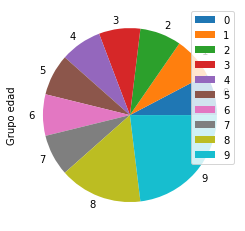

In [26]:
# Graficos Circulares
# Graficamos 
df_parcial.head(10).plot(kind="pie", x="sexo_",y ="Grupo edad")
plt.show()



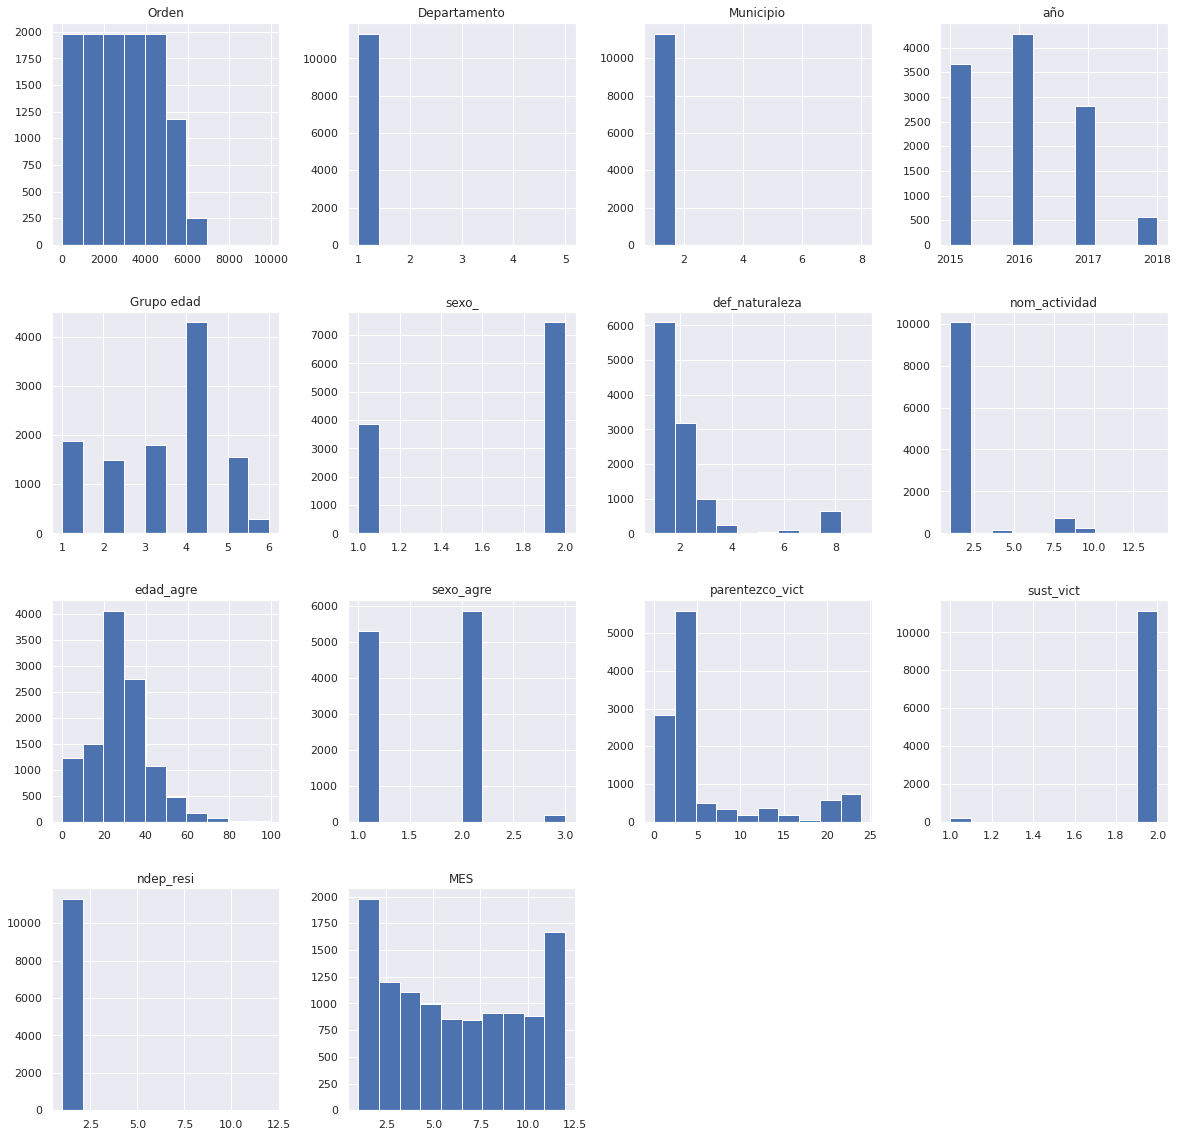

In [27]:
sns.set(rc={'figure.figsize':(20,20)})
df_parcial.hist()
plt.show()

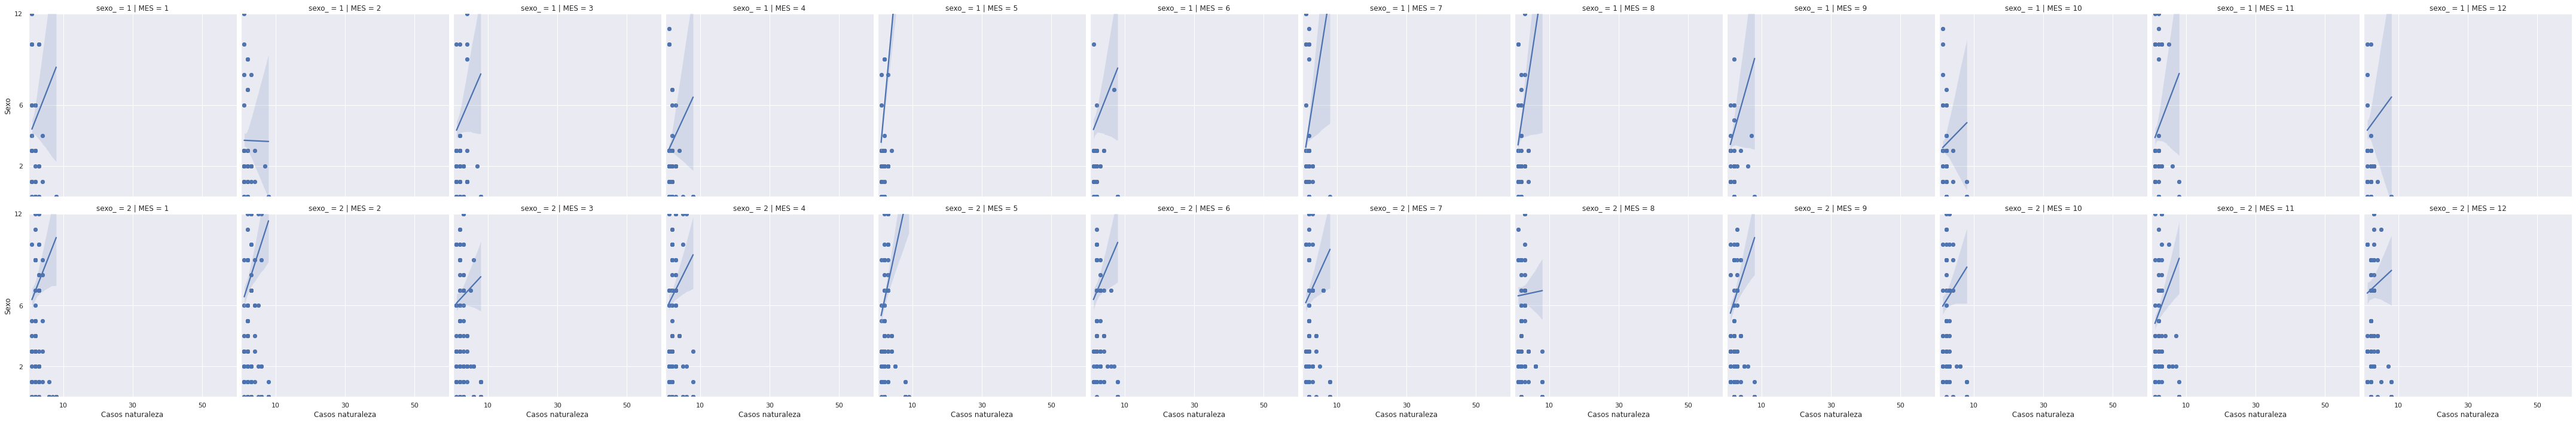

In [28]:
g=((sns.lmplot(x="def_naturaleza",y="parentezco_vict",row="sexo_",col="MES",data=df_parcial,height=5, aspect=1))
.set_axis_labels("Casos naturaleza", "Sexo")
.set(xlim=(0,60),ylim=(0,12),xticks=[10,30,50],yticks=[2,6,12])
.fig.subplots_adjust(wspace=0.02))

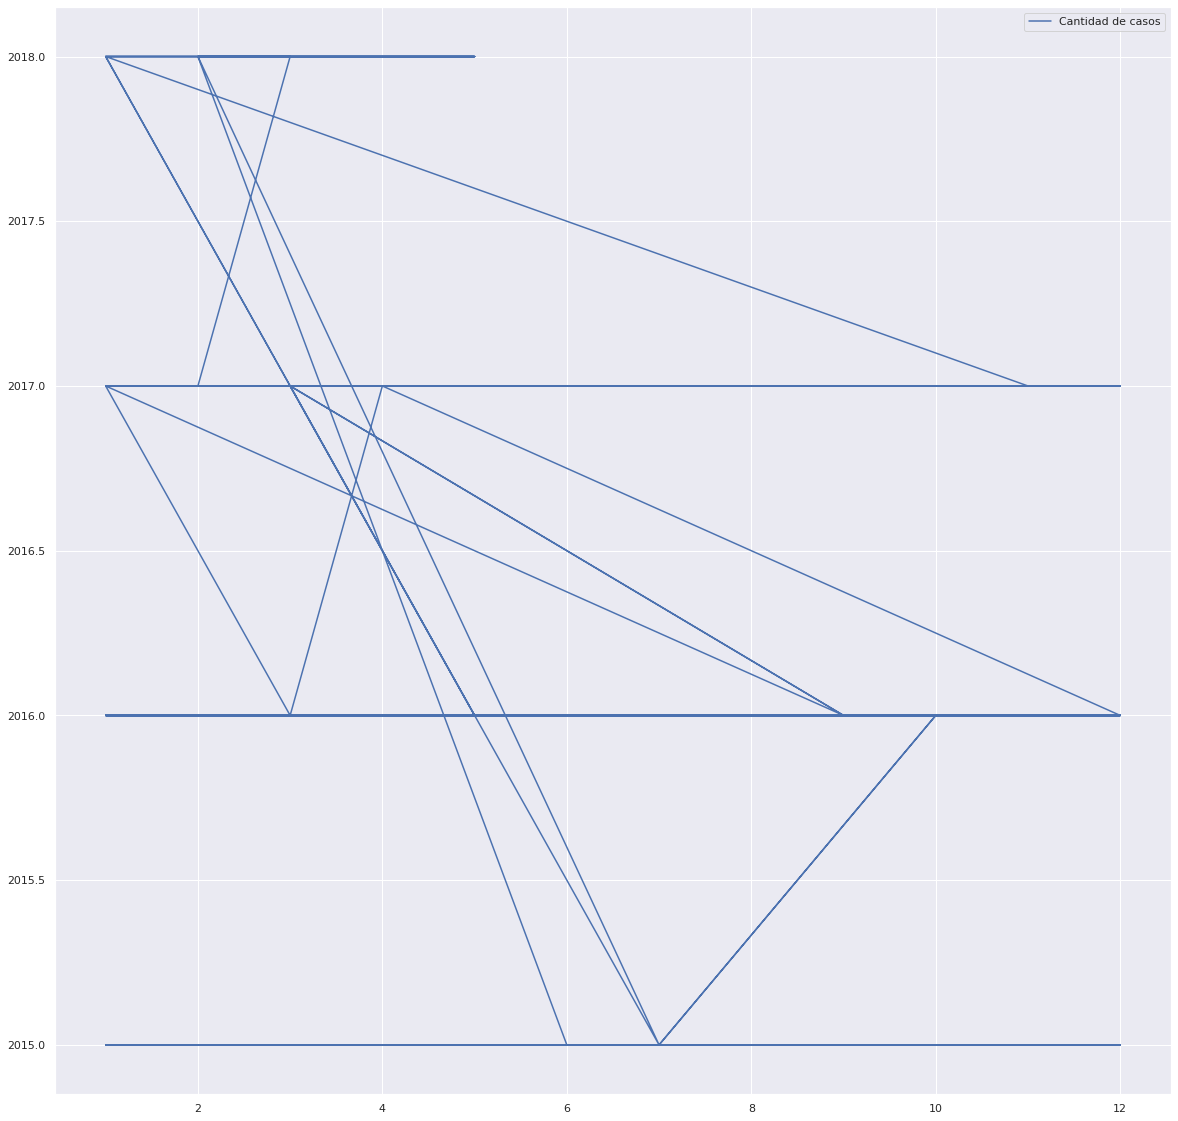

In [29]:
plt.plot(df_parcial['MES'], df_parcial['año'])
# Function add a legend  
plt.legend(['Cantidad de casos'])
# function to show the plot
plt.show()

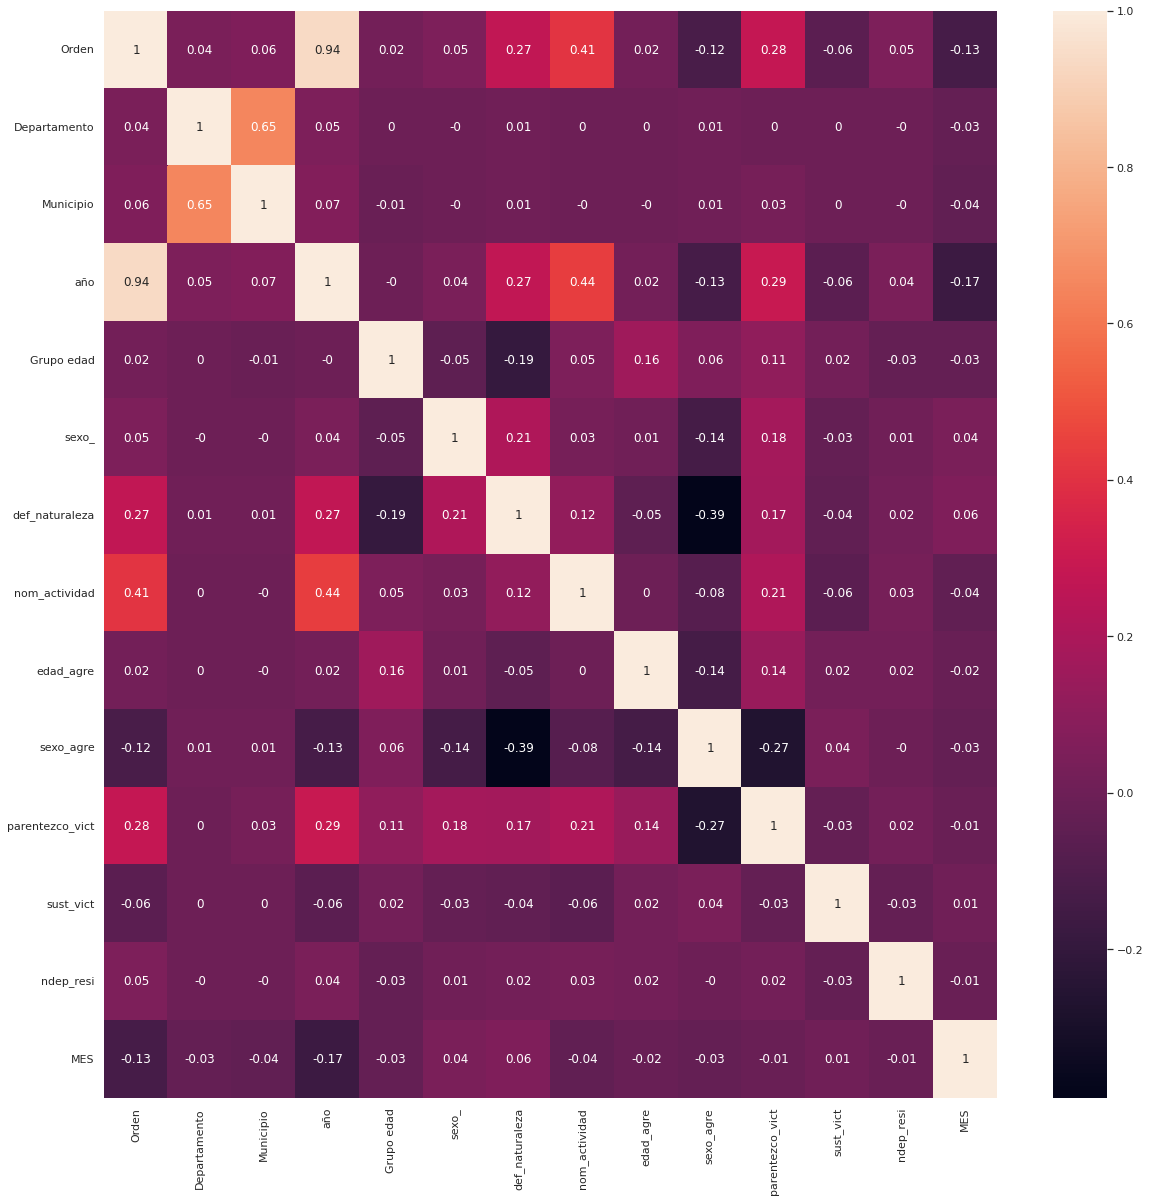

In [30]:
correlation_matrix = df_parcial.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

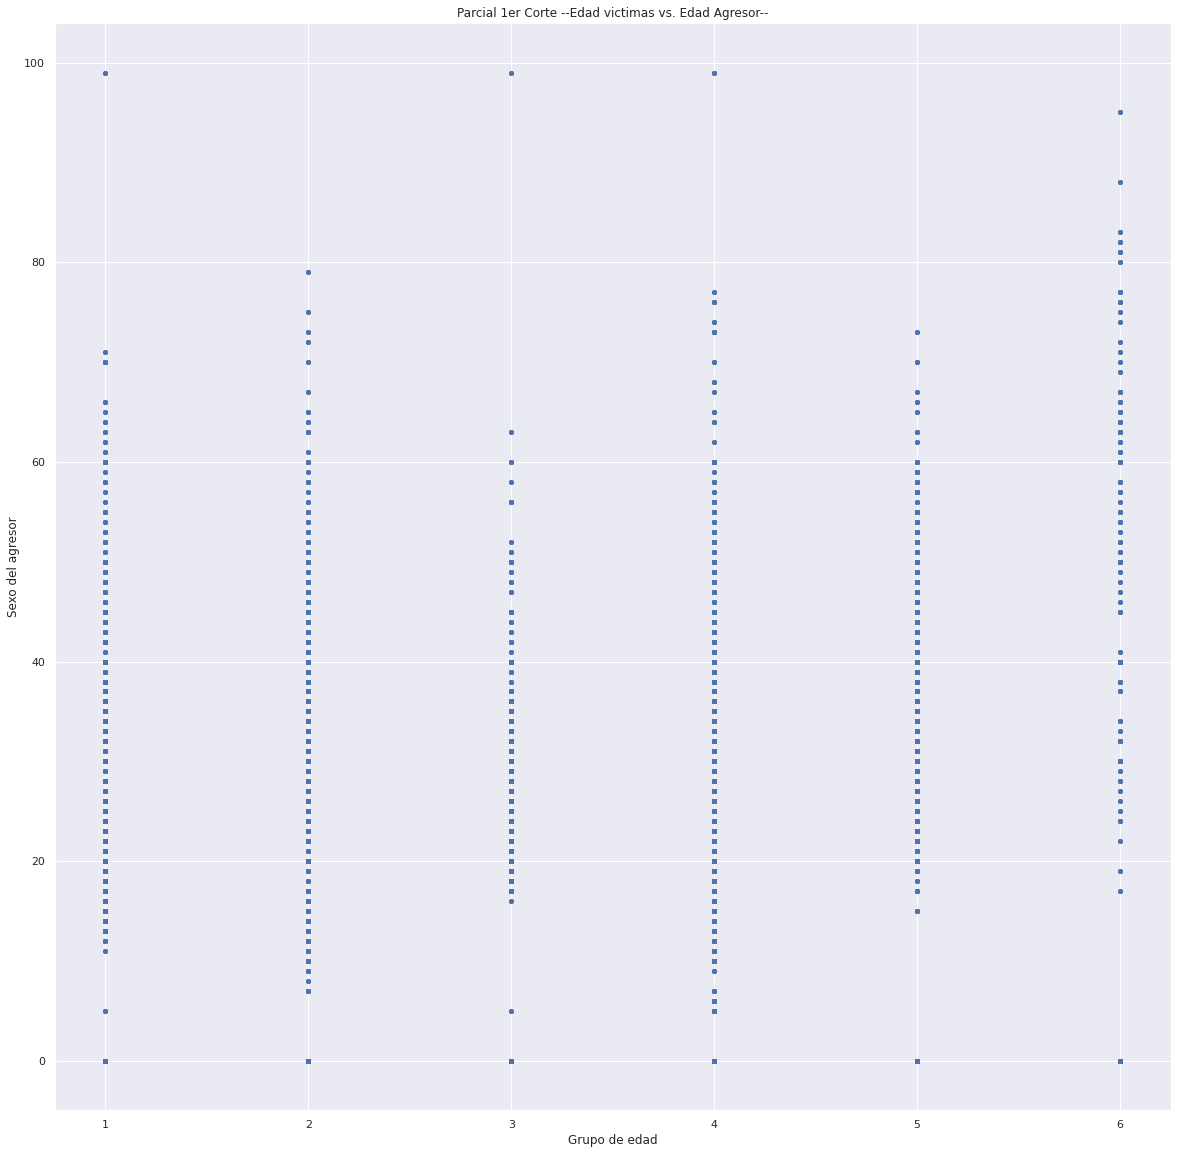

In [31]:
#%% Representación gráfica de los datos.
x = df_parcial['Grupo edad'].values
y = df_parcial['edad_agre'].values
plt.xlabel('Grupo de edad')
plt.ylabel('Sexo del agresor')
plt.title('Parcial 1er Corte --Edad victimas vs. Edad Agresor--')
plt.plot(x,y,'o',markersize=4)



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


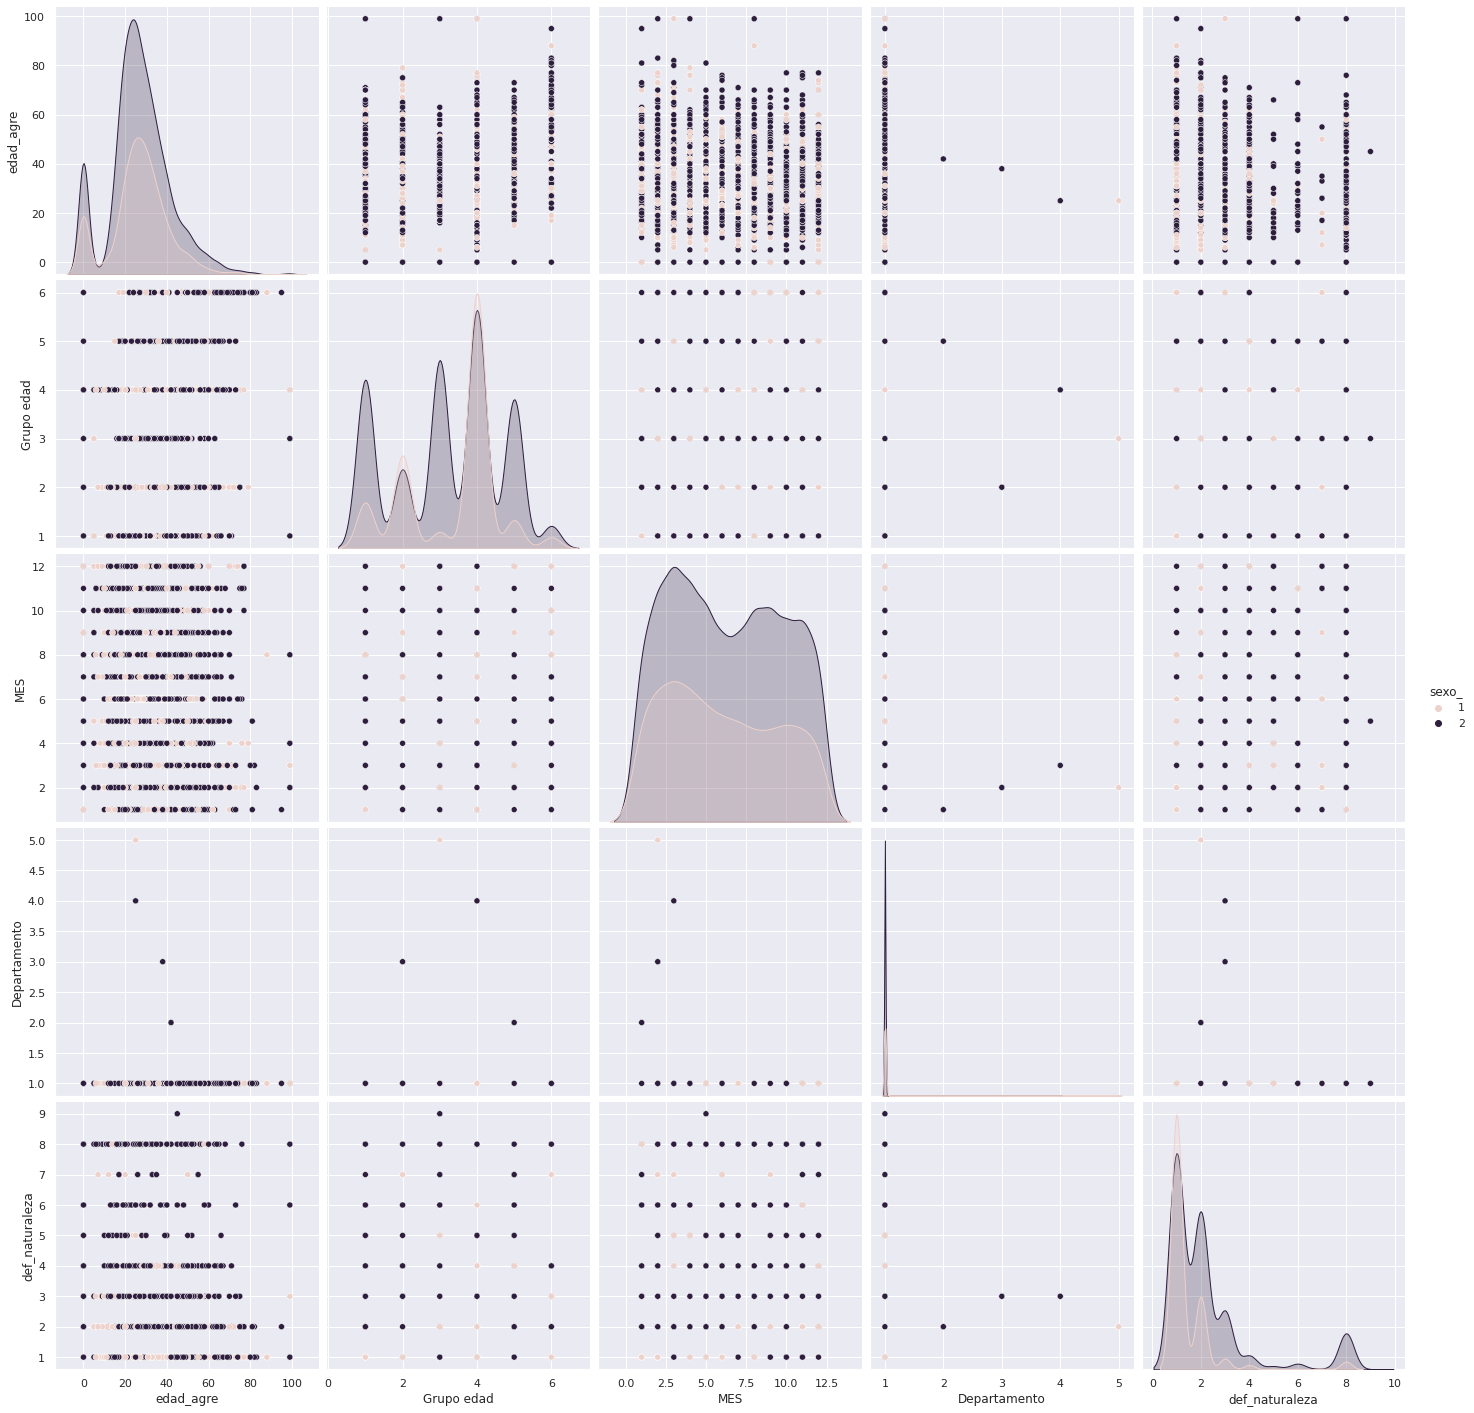

In [32]:
sns.pairplot(df_parcial, hue='sexo_',size=4,vars=["edad_agre","Grupo edad","MES","Departamento","def_naturaleza"],kind='scatter')

#P3. Algoritmo de k-means (30%)

#### SEPARAR DATOS X Y Y


In [33]:
X = np.array(df_parcial[["edad_agre","sexo_","parentezco_vict","año","def_naturaleza"]])
y = np.array(df_parcial['Grupo edad'])
X.shape

(11339, 5)

In [34]:
df_parcial['Grupo edad'].unique()

array([1, 2, 3, 4, 5, 6])

##P3.1 gráfica elbow o de codo (20%)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'cyan', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'cyan', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'green', 'green', 'cyan', 'blue', 'cyan', 'cyan', 'green', 'green', 'cyan', 'yellow', 'green', 'cyan', 'cyan', 'yellow', 'yellow', 'cyan', 'cyan', 'cyan', 'cyan', 'blue', 'blue', 'cyan', 'green', 'green', 'green', 'cyan', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'cyan', 'cyan', 'cyan', 'green', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'red', 'gr

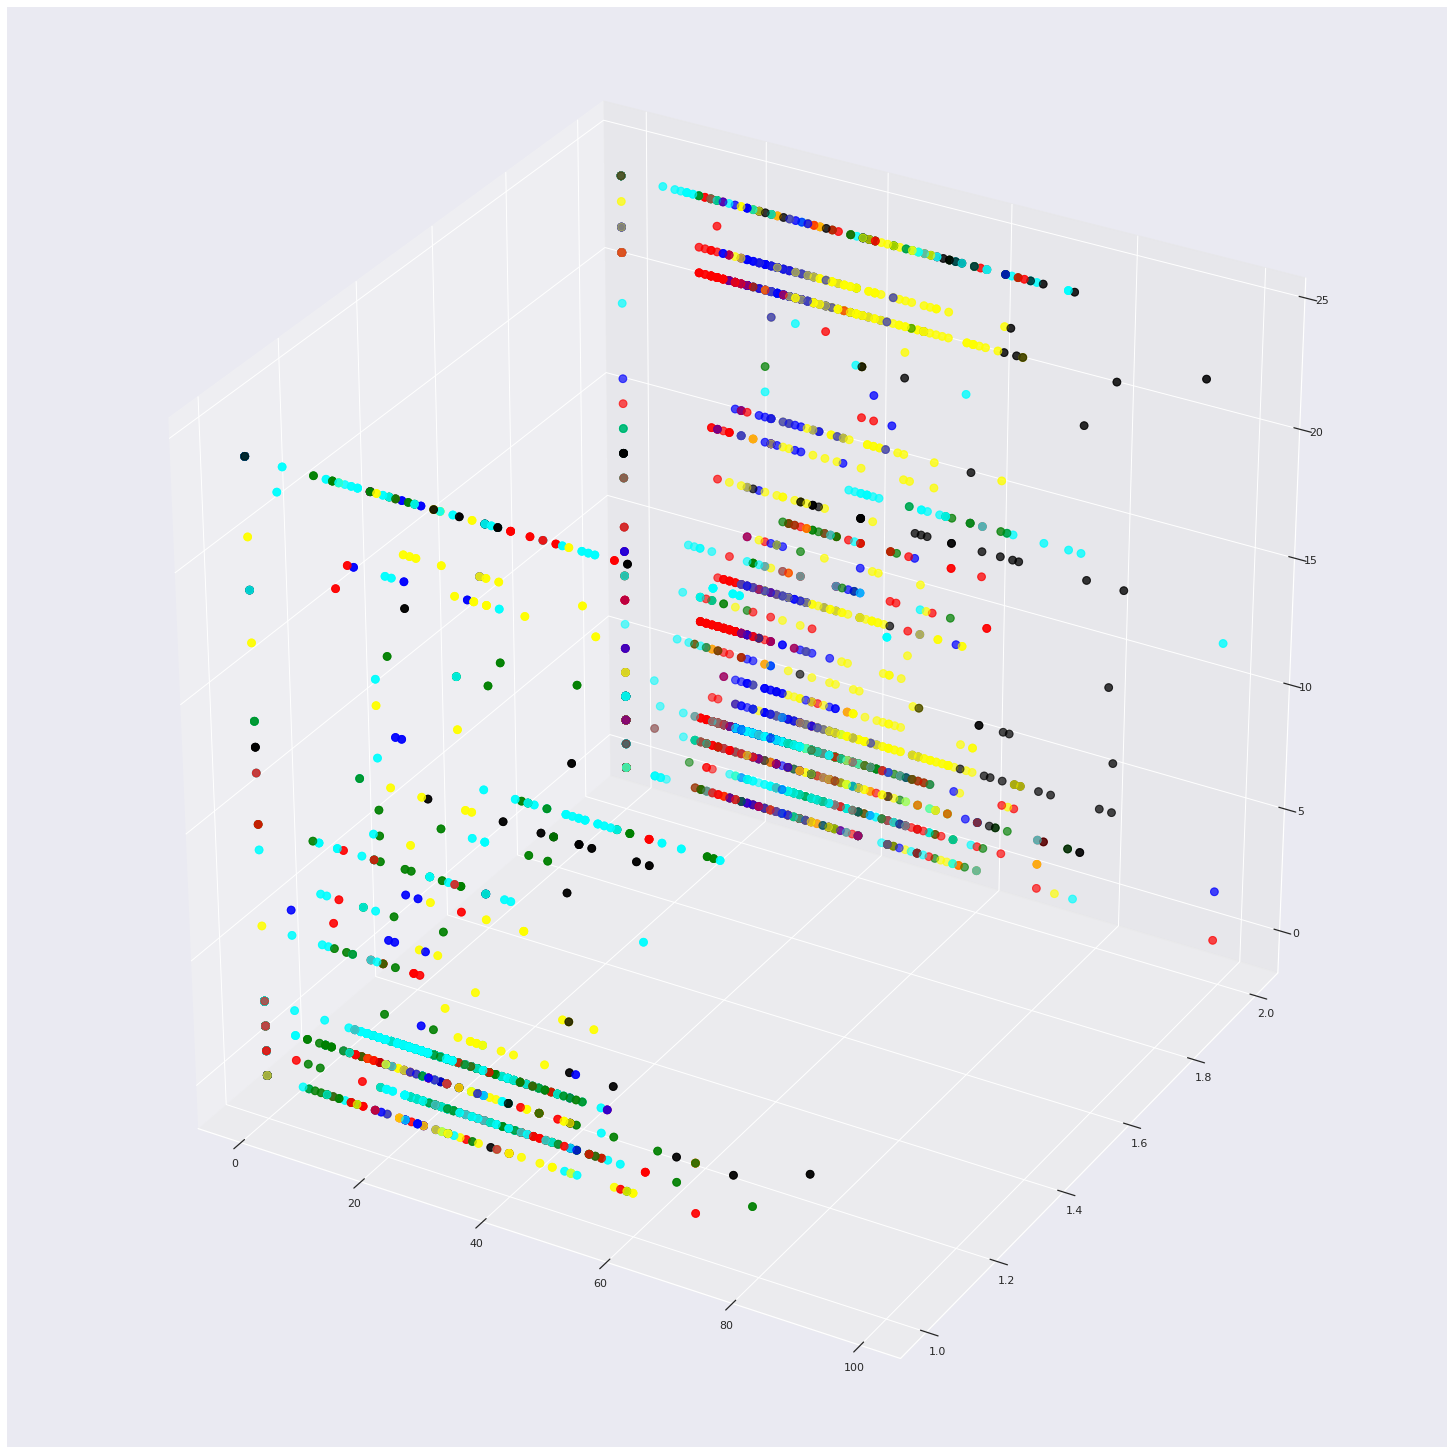

In [35]:
#Código del grafico de codo que me premite saber cual el la cantidad de centroides ideal
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','black']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)



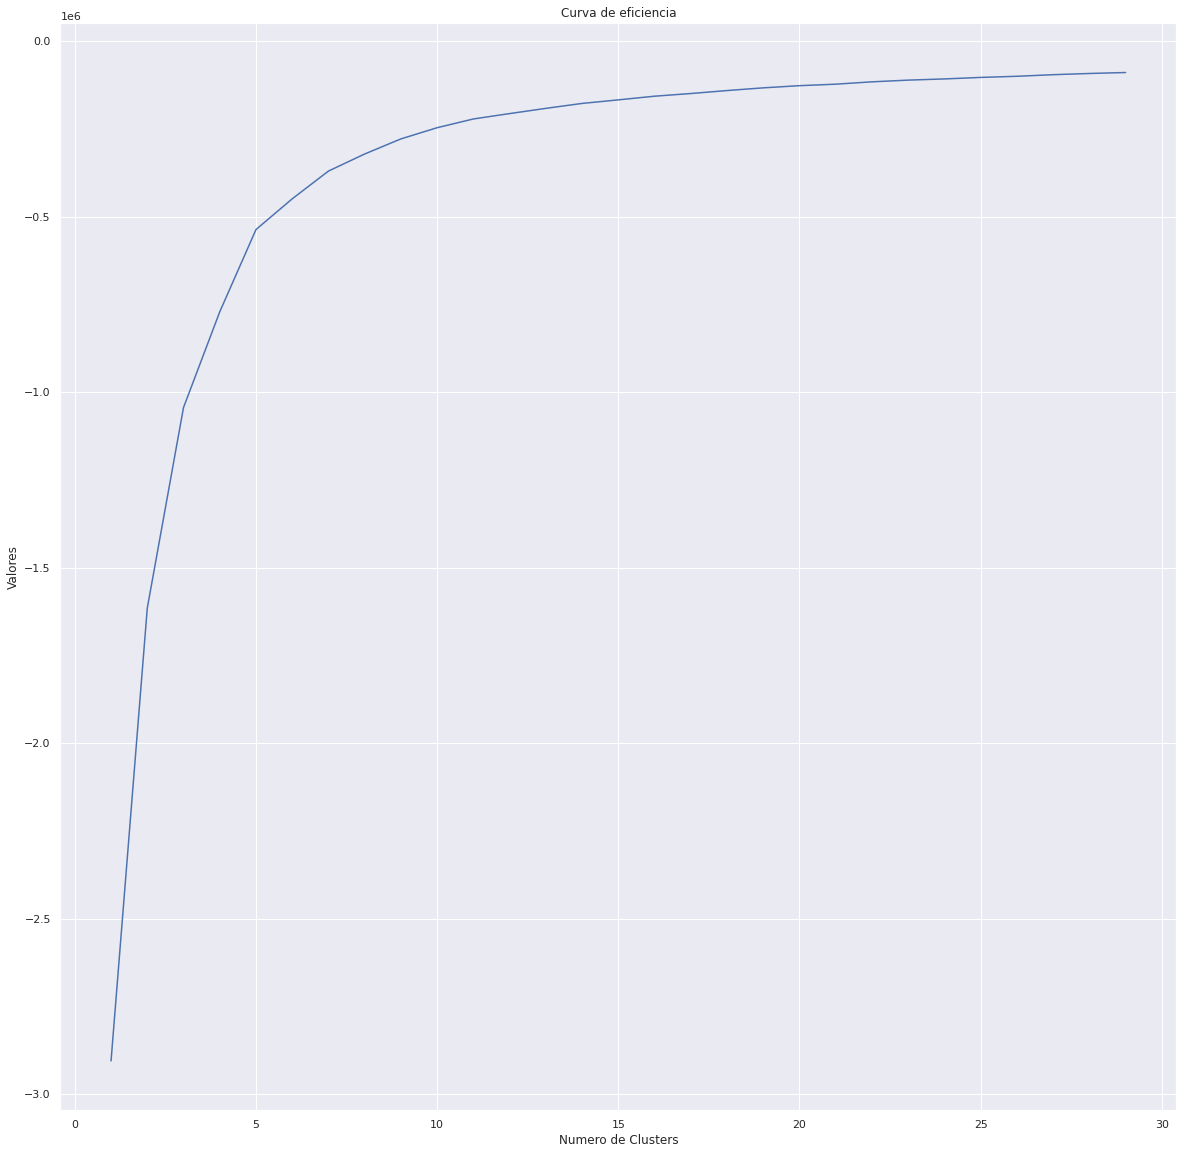

In [36]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

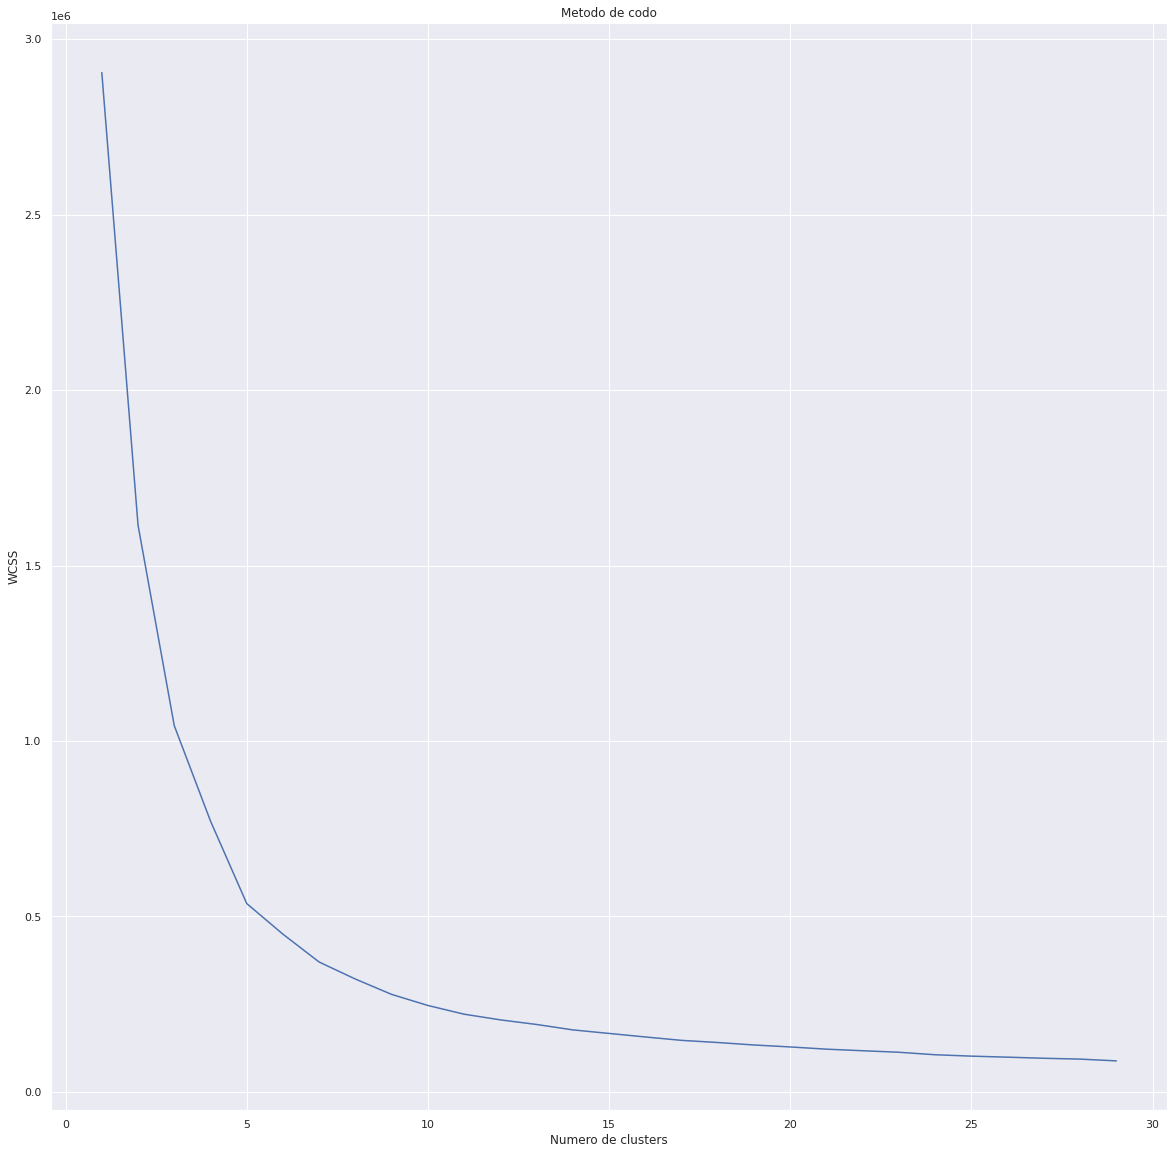

In [37]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##P3.2 buscando los centroides (30%)

In [38]:
# codigo fuente para buscar centroidos
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.81533898e+01 1.86101695e+00 2.07906780e+01 2.01682373e+03
  3.02711864e+00]
 [7.11598746e-01 1.60893417e+00 4.59561129e+00 2.01614655e+03
  2.53448276e+00]
 [3.42816941e+01 1.58735024e+00 3.04235163e+00 2.01591418e+03
  1.67762608e+00]
 [2.15443870e+01 1.66416158e+00 3.41921090e+00 2.01583255e+03
  1.70056364e+00]
 [5.52972973e+01 1.70656371e+00 9.60617761e+00 2.01611390e+03
  2.38610039e+00]]


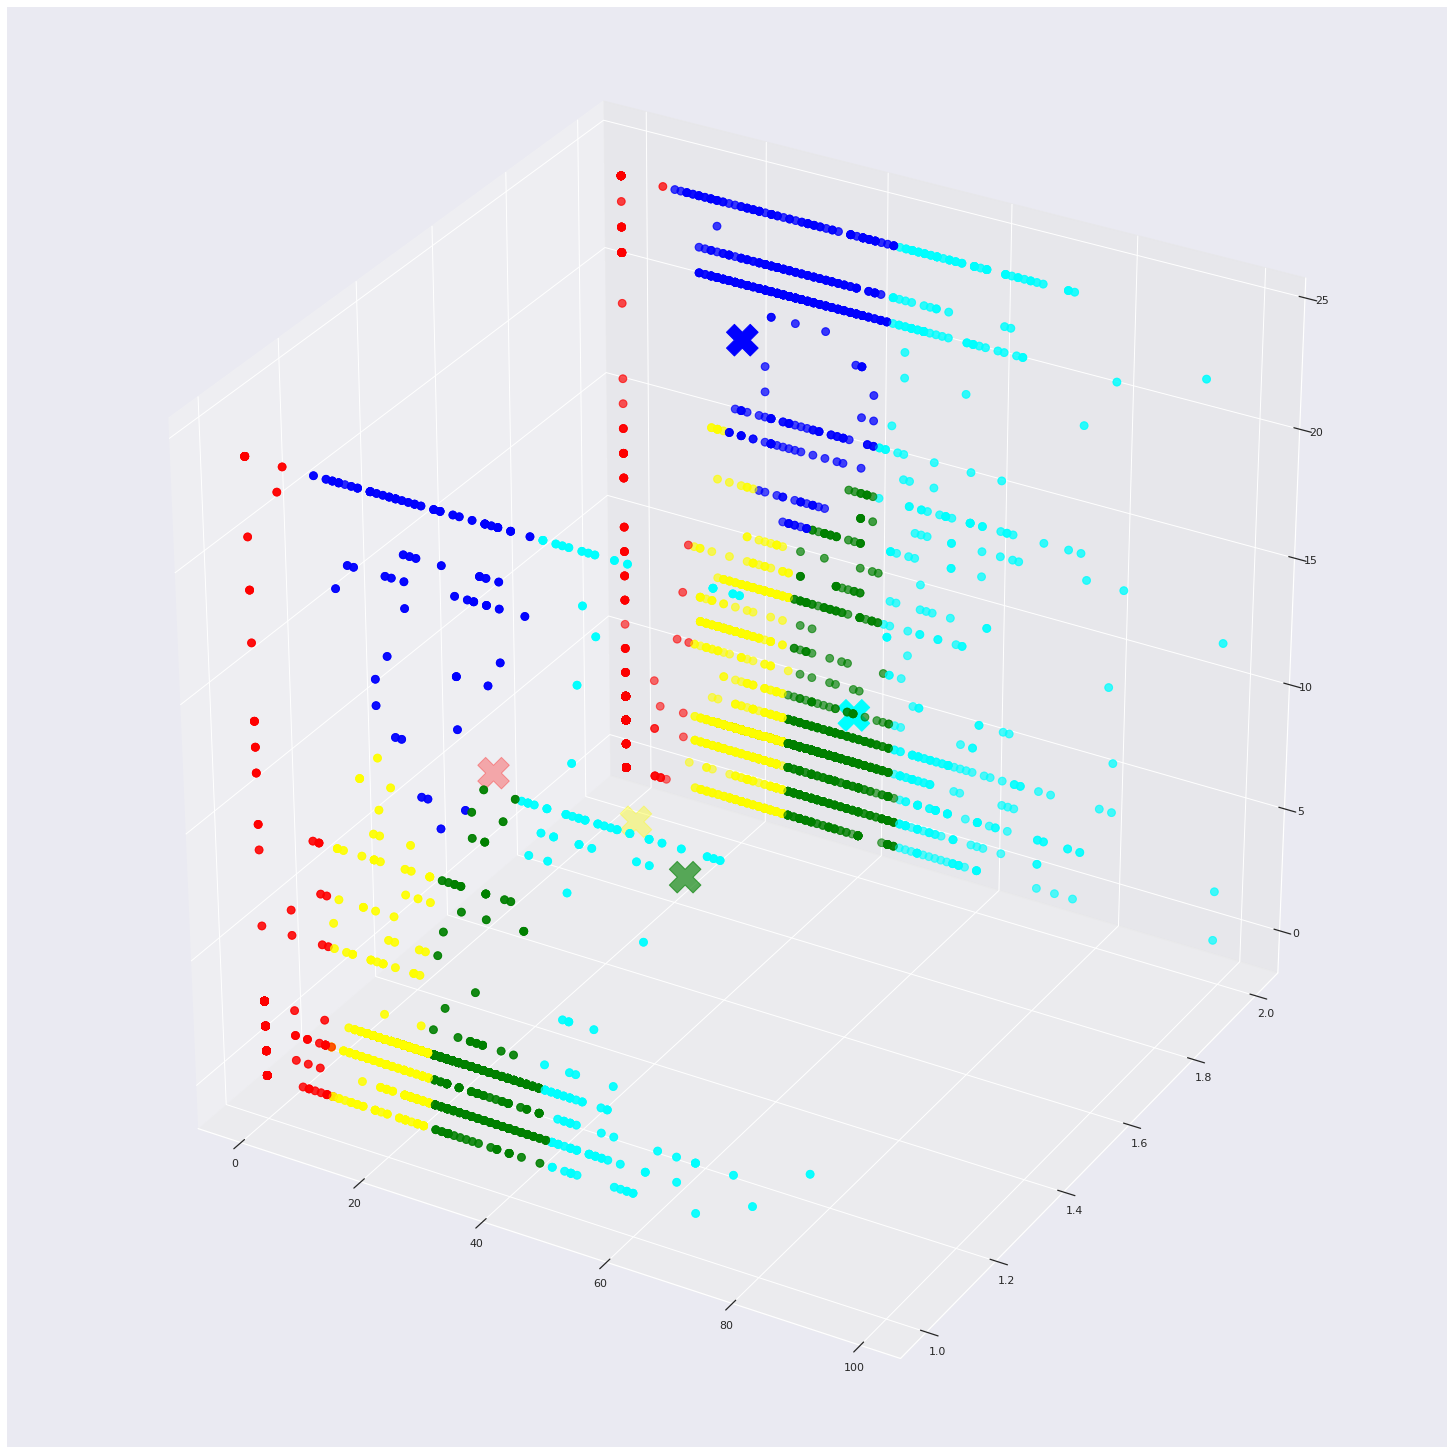

In [39]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='X', c=colores, s=1000)



##P3.3 Etiquetado de datos. (20%)

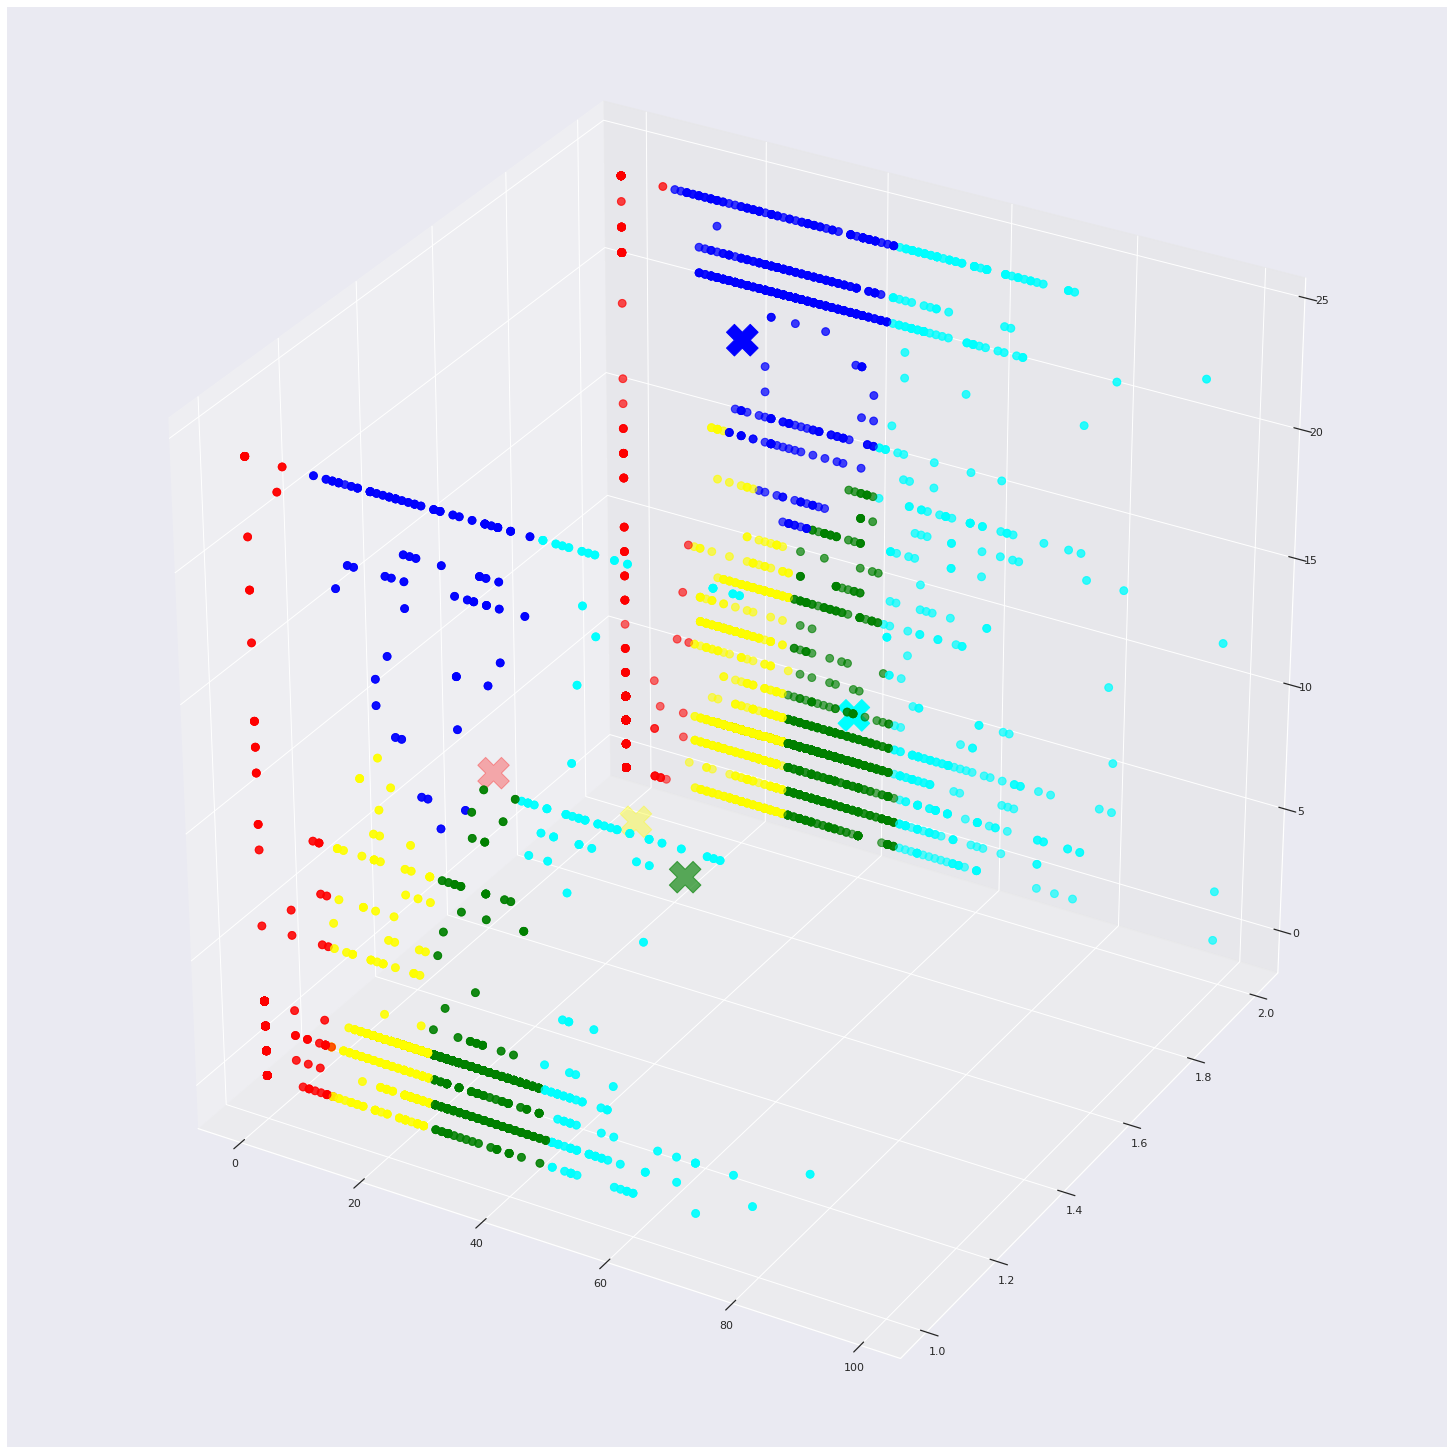

In [40]:
#código fuente de etiquetar el 100% de la data segun el kmeans.predict
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='X', c=colores, s=1000)



##P3.4 Representación gráfica de los clústeres k-means.(20%)

---
Una vez con los datos etiquetados, generar gráficamente en dos dimensiones el clustering realizado por k-means, usar dos variables


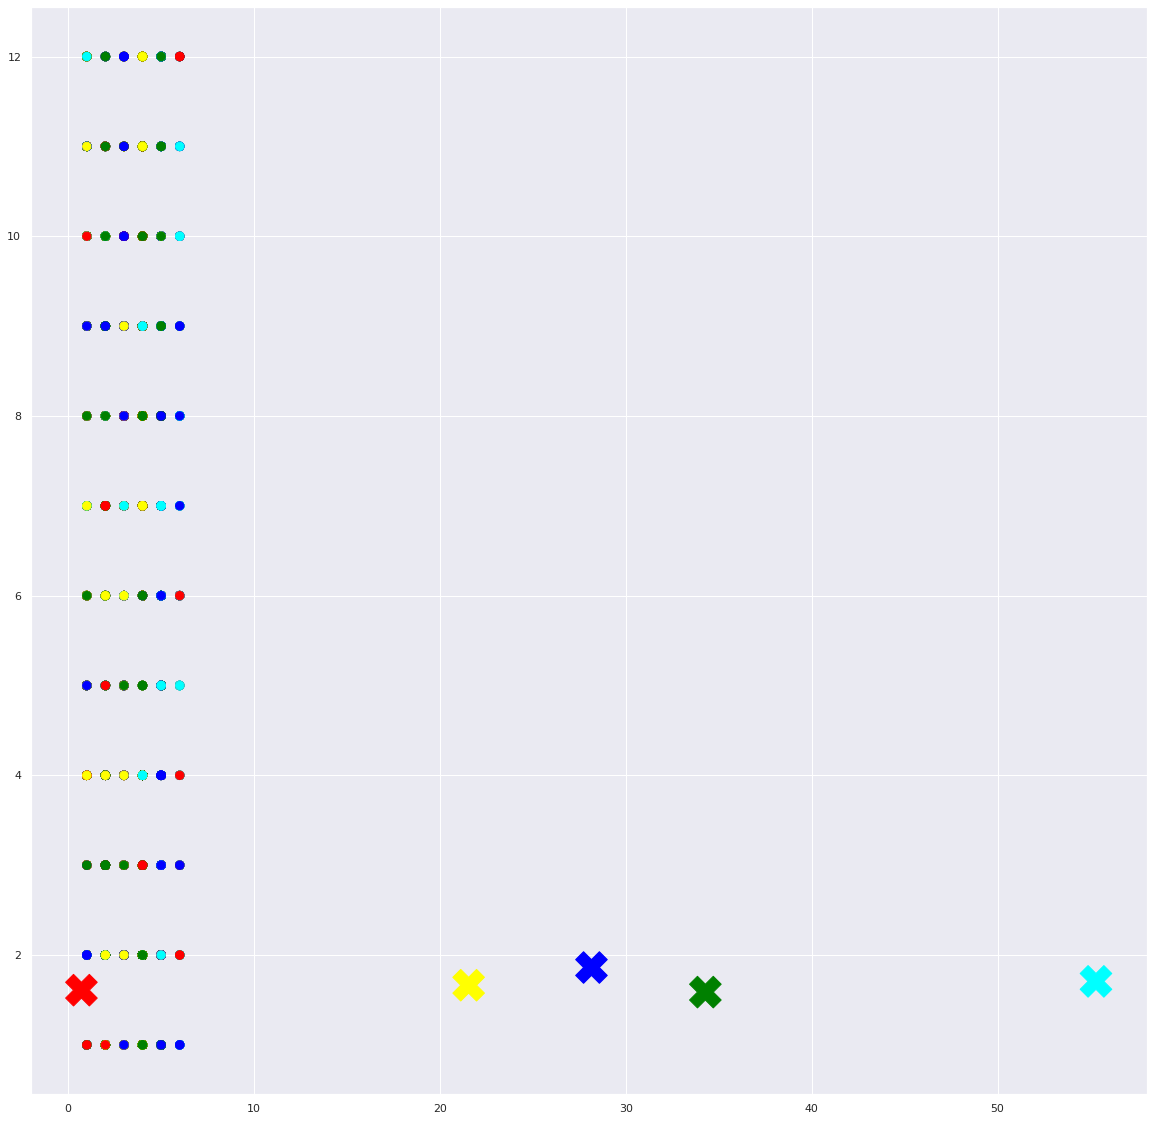

In [41]:
# codigo del grafico
f1 = df_parcial['Grupo edad'].values
f2 = df_parcial['MES'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='X', c=colores, s=1000)
plt.show()

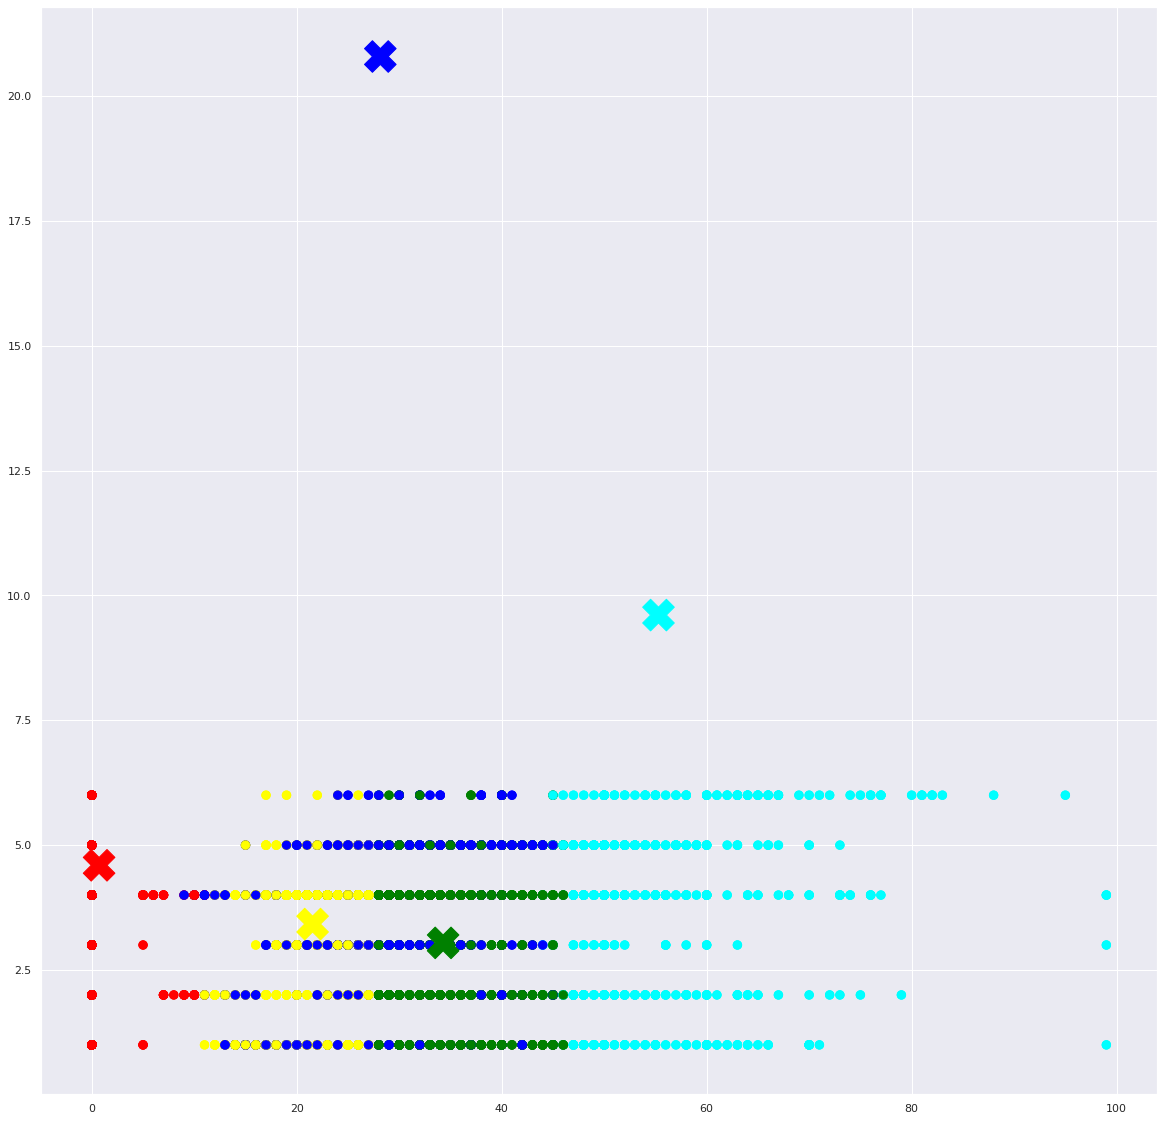

In [42]:
f1 = df_parcial['edad_agre'].values
f2 = df_parcial['Grupo edad'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='X', c=colores, s=1000)
plt.show()



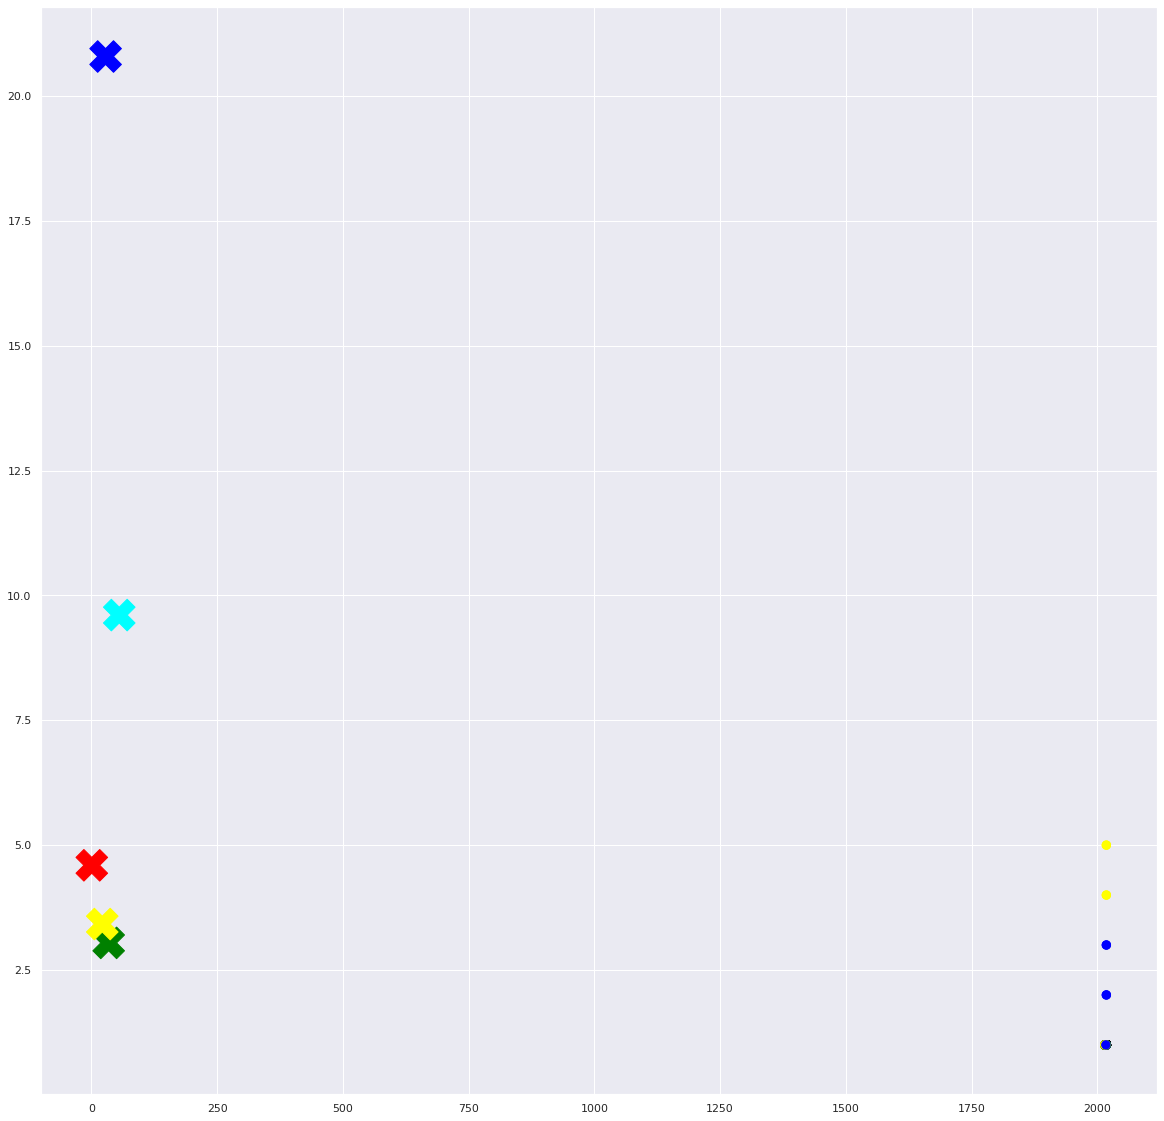

In [43]:
f1 = df_parcial['año'].values
f2 = df_parcial['Departamento'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='X', c=colores, s=1000)
plt.show()



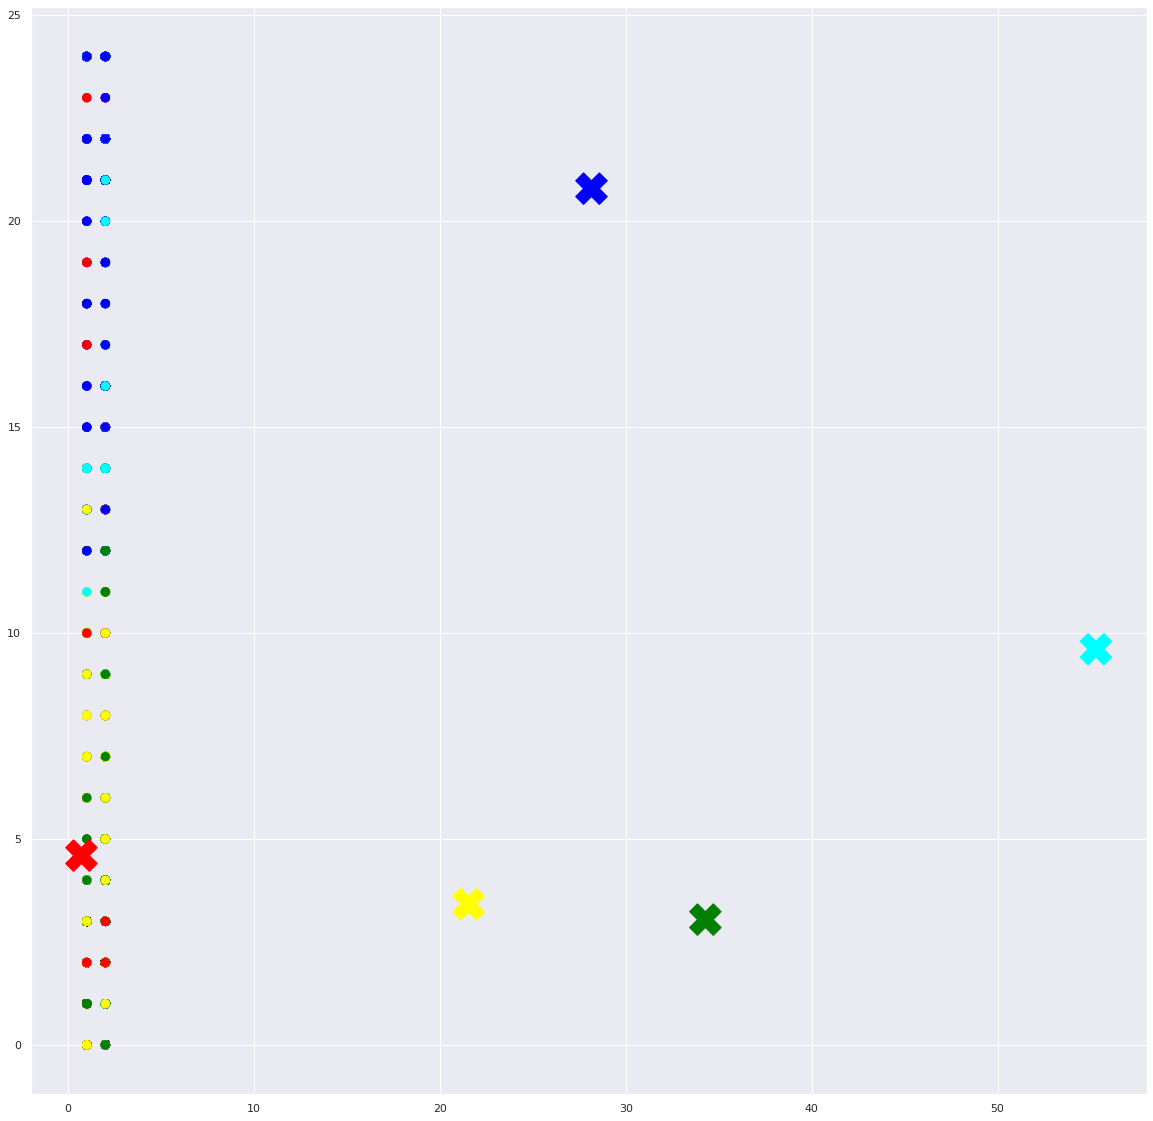

In [44]:
f1 = df_parcial['sexo_'].values
f2 = df_parcial['parentezco_vict'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='X', c=colores, s=1000)
plt.show()



##P3.5 exportar el Dataset con los labels (10%)

In [45]:
copy =  pd.DataFrame()
copy['Grupo edad']=df_parcial['Grupo edad'].values
copy['edad_agre']=df_parcial['edad_agre'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,1184
1,red,1276
2,green,3585
3,yellow,4260
4,cyan,1034


In [46]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[1,2,3,4,5,6]
diversidadGrupo['cantidad']=group_referrals.groupby('Grupo edad').size()
diversidadGrupo

,categoria,cantidad
0,1,NaN
1,2,199.0
2,3,82.0
3,4,388.0
4,5,92.0
5,6,379.0


#P4.algoritmo de machine Learning  (30%)

---

Seleccione un algoritmo (regresión lineal ó regresión logistica ó arboles de clasificación) que tenga la mejor inferencia

##P4.1 Preparación de los datos para el entrenamiento del modelo (10%)

In [47]:


X_train, X_test, Y_train, Y_test = train_test_split(df_iris[database_iris.feature_names],df_iris['target'], random_state=42)

NameError: ignored

##P4.2 Dividir los datos en conjuntos de entrenamiento (X %) y pruebas (X %) (30%)

##P4.3 Entrenando el modelo (20%)

##P4.4 Evaluación del modelo (40%)


##P4.5 la predicción es superior a 80%???